# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.19 which is incompatible.


In [2]:
from workspace_utils import active_session

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(f'brain_name: {brain_name}')
print(f'brain: {brain}')

brain_name: ReacherBrain
brain: Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print(f'Number of agents: {num_agents}')

# size of each action
action_size = brain.vector_action_space_size
print(f'Size of each action: {action_size}')

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print(f'There are {states.shape[0]} agents. Each observes a state with length: {state_size}')
print(f'The state for the first agent looks like: {states[0]}')

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [6]:
states.shape

(1, 33)

In [7]:
states[0]

array([  0.00000000e+00,  -4.00000000e+00,   0.00000000e+00,
         1.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -4.37113883e-08,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.00000000e+01,
         0.00000000e+00,   1.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -4.37113883e-08,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   5.75471878e+00,
        -1.00000000e+00,   5.55726671e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,  -1.68164849e-01])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [8]:
random_action_run = False
if random_action_run:
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print(f'Total score (averaged over agents) this episode: {np.mean(scores)}')

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

## A single agent

In [9]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [10]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)

In [11]:
# testing...
agent

In [12]:
# examine the agent
print(f'agent.state_size: {agent.state_size}')
print(f'agent.action_size: {agent.action_size}')
print(f'agent.seed: {agent.seed}')
print(f'agent.actor_local: {agent.actor_local}')
print(f'agent.actor_target: {agent.actor_target}')
print(f'agent.critic_local: {agent.critic_local}')
print(f'agent.critic_target: {agent.critic_target}')
print(f'agent.actor_optimizer: {agent.actor_local}')
print(f'agent.critic: {agent.actor_local}')

agent.state_size: 33
agent.action_size: 4
agent.seed: None
agent.actor_local: Actor(
  (fc1): Linear(in_features=33, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)
agent.actor_target: Actor(
  (fc1): Linear(in_features=33, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)
agent.critic_local: Critic(
  (fcs1): Linear(in_features=33, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, trac

In [13]:
def ddpg(n_episodes=1000, max_t=1000, print_every=1):
    """
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timestep per episode
        print_every: (int): interval to printing results
    """    
    scores_window = deque(maxlen=100)  # mean scores of the last 100 episodes
    mean_scores = []                   # mean scores 

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # reset environment
        states = env_info.vector_observations                   # get current state for each agent      
        scores = np.zeros(num_agents)                           # initialize score for each agent
        
        agent.reset()

        for t in range(max_t):
            actions = agent.act(states, add_noise=True)         # select an action
            env_info = env.step(actions)[brain_name]            # send all actions to the environment
            next_states = env_info.vector_observations          # get next state (for each agent)
            rewards = env_info.rewards                          # get reward (for each agent)
            dones = env_info.local_done                         # see if episode finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t) 
              
            scores += env_info.rewards                          # update the score (for each agent)
            states = next_states                                # roll over states to next time step
            
            if t % 100 == 0:
                print('\rTimestep {}\tScore: {:.2f}'.format(t, np.mean(scores)), end="")
            
            if np.any(dones):                                   
                break
        
        mean_scores.append(np.mean(scores))           
        scores_window.append(mean_scores[-1])
                
        if i_episode % print_every == 0:
            print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'\
                  .format(i_episode, np.mean(scores), np.mean(scores_window)), end="\n")

        if np.mean(scores_window) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return mean_scores

In [14]:
with active_session():
    scores = ddpg()

Episode 1	Score: 0.00	Average Score: 0.00
Episode 2	Score: 1.07	Average Score: 0.53
Episode 3	Score: 0.06	Average Score: 0.38
Episode 4	Score: 1.12	Average Score: 0.56
Episode 5	Score: 0.22	Average Score: 0.49
Episode 6	Score: 0.26	Average Score: 0.45
Episode 7	Score: 0.84	Average Score: 0.51
Episode 8	Score: 0.57	Average Score: 0.52
Episode 9	Score: 0.65	Average Score: 0.53
Episode 10	Score: 0.65	Average Score: 0.54
Episode 11	Score: 0.24	Average Score: 0.52
Episode 12	Score: 0.97	Average Score: 0.55
Episode 13	Score: 0.00	Average Score: 0.51
Episode 14	Score: 0.71	Average Score: 0.53
Episode 15	Score: 1.52	Average Score: 0.59
Episode 16	Score: 1.45	Average Score: 0.65
Episode 17	Score: 0.37	Average Score: 0.63
Episode 18	Score: 1.26	Average Score: 0.66
Episode 19	Score: 0.40	Average Score: 0.65
Episode 20	Score: 1.47	Average Score: 0.69
Episode 21	Score: 0.93	Average Score: 0.70
Episode 22	Score: 2.29	Average Score: 0.77
Episode 23	Score: 2.36	Average Score: 0.84
Episode 24	Score: 2.

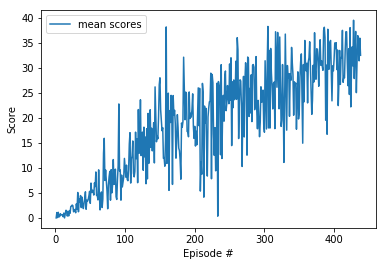

In [15]:
plt.plot(np.arange(1, len(scores)+1), scores, label='mean scores')
plt.legend(loc='upper left');
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [16]:
env.close()